<a href="https://colab.research.google.com/github/wkt84/emt-python/blob/master/notebook/Python09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 計画情報を見る

## 環境の再構築

In [1]:
!pip install pydicom  # pydicomのインストール
import pydicom

     |████████████████████████████████| 7.0MB 4.6MB/s 


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
cd '/gdrive/My Drive/python/DICOMdata/'

/gdrive/My Drive/python/DICOMdata


In [0]:
# いつもの表示の設定

import matplotlib.pyplot as plt
from matplotlib import rc
rc('axes', grid=False)

## DICOM RT Planを読み込もう

In [5]:
plan = pydicom.dcmread('RP.002445.Plan1.dcm')
print(plan)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20181113'
(0008, 0013) Instance Creation Time              TM: '103359.675000'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.5.828000091838.1206.20181113103014
(0008, 0020) Study Date                          DA: '20060905'
(0008, 0030) Study Time                          TM: '142544'
(0008, 0050) Accession Number                    SH: '442542.001'
(0008, 0060) Modality                            CS: 'RTPLAN'
(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'ECS144'
(0008, 1030) Study Description                   LO: 'GUIDANCE PLACEMENT THE'
(0008, 103e) Series Description                  LO: 'ARIA RadOnc Plans'
(0008, 1070) Operators' Name

### Dose Reference Sequence

In [6]:
print('Reference Pointの数:', len(plan.DoseReferenceSequence))
plan.DoseReferenceSequence[0]

Reference Pointの数: 1


(300a, 0012) Dose Reference Number               IS: "1"
(300a, 0013) Dose Reference UID                  UI: 1.2.246.352.71.10.828000091838.296.20180830124946
(300a, 0014) Dose Reference Structure Type       CS: 'SITE'
(300a, 0016) Dose Reference Description          LO: 'PTV70'
(300a, 0020) Dose Reference Type                 CS: 'ORGAN_AT_RISK'
(3267, 0010) Private Creator                     LO: 'Varian Medical Systems VISION 3267'
(3267, 1000) Private tag data                    UN: b'PTV70 '

### Fraction Group Sequence

In [7]:
print('Fraction Groupの数:', len(plan.FractionGroupSequence))
plan.FractionGroupSequence[0]

Fraction Groupの数: 1


(300a, 0071) Fraction Group Number               IS: "1"
(300a, 0078) Number of Fractions Planned         IS: "20"
(300a, 0080) Number of Beams                     IS: "2"
(300a, 00a0) Number of Brachy Application Setups IS: "0"
(300c, 0004)  Referenced Beam Sequence   2 item(s) ---- 
   (300a, 0084) Beam Dose                           DS: "1.164"
   (300a, 0086) Beam Meterset                       DS: "119.497695238506"
   (300c, 0006) Referenced Beam Number              IS: "1"
   (3249, 0010) Private Creator                     LO: 'Varian Medical Systems VISION 3249'
   (3249, 1010) Private tag data                    UN: b'1.2.246.352.71.10.828000091838.296.20180830124946\x00'
   ---------
   (300a, 0084) Beam Dose                           DS: "8.36e-1"
   (300a, 0086) Beam Meterset                       DS: "102.520819636609"
   (300c, 0006) Referenced Beam Number              IS: "2"
   (3249, 0010) Private Creator                     LO: 'Varian Medical Systems VISION 3249'
  

### Beam Sequence

In [8]:
print('Beamの数:', len(plan.BeamSequence))
plan.BeamSequence[0]

Beamの数: 2


(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 1090) Manufacturer's Model Name           LO: 'TDS'
(0018, 1000) Device Serial Number                LO: '0005'
(3002, 0050)  Primary Fluence Mode Sequence   1 item(s) ---- 
   (3002, 0051) Fluence Mode                        CS: 'STANDARD'
   ---------
(300a, 00b2) Treatment Machine Name              SH: 'TrueBeam'
(300a, 00b3) Primary Dosimeter Unit              CS: 'MU'
(300a, 00b4) Source-Axis Distance                DS: "1000"
(300a, 00b6)  Beam Limiting Device Sequence   3 item(s) ---- 
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMX'
   (300a, 00bc) Number of Leaf/Jaw Pairs            IS: "1"
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMY'
   (300a, 00bc) Number of Leaf/Jaw Pairs            IS: "1"
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'MLCX'
   (300a, 00ba) Source to Beam Limiting Device Dist DS: "508.61"
   (300a, 00bc)

Text(0, 0.5, 'Number of Leaves')

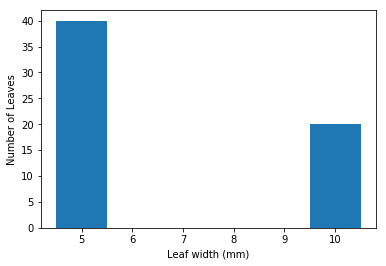

In [9]:
import numpy as np
import matplotlib.pyplot as plt

boundaries = np.array(plan.BeamSequence[0].BeamLimitingDeviceSequence[2].LeafPositionBoundaries)
leaf_widths = np.diff(boundaries)

plt.hist(leaf_widths, np.linspace(4.5,10.5,num=7))
plt.xlabel('Leaf width (mm)')
plt.ylabel('Number of Leaves')

In [10]:
beam0 = plan.BeamSequence[0] # 最初のビーム
cp0 = beam0.ControlPointSequence[0] # 最初のコントロールポイント
print(cp0)

(300a, 0112) Control Point Index                 IS: "0"
(300a, 0114) Nominal Beam Energy                 DS: "6"
(300a, 0115) Dose Rate Set                       DS: "600"
(300a, 011a)  Beam Limiting Device Position Sequence   3 item(s) ---- 
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMX'
   (300a, 011c) Leaf/Jaw Positions                  DS: ['-56', '58']
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMY'
   (300a, 011c) Leaf/Jaw Positions                  DS: ['-82', '53']
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'MLCX'
   (300a, 011c) Leaf/Jaw Positions                  DS: ['8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '8.5e-1', '19.5', '12.2', '8.2', '6.41', '6.04', '5.89', '5.28', '5.21', '7.25', '10.37', '10.23', '-27.8', '-45.4', '-51.6', '-54.75', '-55.46', '-55.58', '-54.02', '-51.8', '-51.15', '-51.75', '-51.2', '-47.8', '-45.4', 

### Beams Eye Viewを作る

In [0]:
def make_bev(beam, ax):

    num_of_leaves = beam.BeamLimitingDeviceSequence[2].NumberOfLeafJawPairs # Leaf対の数
    
    cp0 = beam.ControlPointSequence[0] # 最初のコントロールポイント

    jaw_x = cp0.BeamLimitingDevicePositionSequence[0].LeafJawPositions # X Jawの位置
    jaw_y = cp0.BeamLimitingDevicePositionSequence[1].LeafJawPositions # Y Jawの位置
    leaf_position = cp0.BeamLimitingDevicePositionSequence[2].LeafJawPositions # MLCの位置
    
    boundaries = np.array(beam.BeamLimitingDeviceSequence[2].LeafPositionBoundaries) # Leaf境界のY座標
    leaf_widths = np.diff(boundaries) # Leafの幅
    
    leaf_length = 200 # Leafの長さ

    # コリメータ回転対応
    angle = float(cp0.BeamLimitingDeviceAngle)
    angle_rad = np.radians(angle)
    a_sin = np.sin(angle_rad)
    a_cos = np.cos(angle_rad)

    # X/Y Jaw
    x_0 = jaw_x[0]*a_cos - jaw_y[0]*a_sin
    y_0 = jaw_x[0]*a_sin + jaw_y[0]*a_cos
    ax.add_patch(plt.Rectangle(
        xy=(x_0, y_0),
        width=jaw_x[1]-jaw_x[0],
        height=jaw_y[1]-jaw_y[0],
        fill=False, ec='yellow', angle=angle, lw=1.5))

    for i in range(num_of_leaves):
        # X1側のMLC
        x_1 = (leaf_position[i]-leaf_length)*a_cos - boundaries[i]*a_sin
        y_1 = (leaf_position[i]-leaf_length)*a_sin + boundaries[i]*a_cos
        ax.add_patch(plt.Rectangle(
            xy=(x_1, y_1),
            width=leaf_length,
            height=leaf_widths[i],
            fill=True, ec='blue', angle=angle, lw=1., alpha=0.3))
        
        # X2側のMLC
        x_2 = leaf_position[i+num_of_leaves]*a_cos - boundaries[i]*a_sin
        y_2 = leaf_position[i+num_of_leaves]*a_sin + boundaries[i]*a_cos
        ax.add_patch(plt.Rectangle(
            xy=(x_2, y_2),
            width=leaf_length,
            height=leaf_widths[i],
            fill=True, ec='blue', angle=angle, lw=1., alpha=0.3))

    ax.patch.set_facecolor('gray')
    
    # 表示範囲の設定、最も長い対角線+marginが表示範囲に含まれるように
    disp = max([np.sqrt(i**2 + j**2) for i in jaw_x for j in jaw_y])
    margin = 30
    disp += margin
    ax.set_xlim([-disp, disp])
    ax.set_ylim([-disp, disp])
    ax.set_aspect('equal')

Text(0.5, 1.0, 'Field 2')

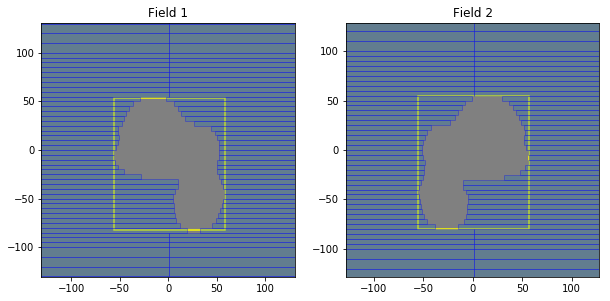

In [12]:
fig = plt.figure(figsize=(10,5)) # figureサイズを指定
ax1 = fig.add_subplot(1,2,1) # 1行2列の1番目のSubplotを追加
make_bev(plan.BeamSequence[0], ax1) # 1番目のBeamと作ったSubplotをmake_bev関数に渡す
ax1.set_title(plan.BeamSequence[0].BeamName) # SubplotにTitle追加
ax2 = fig.add_subplot(1,2,2) # 1行2列の2番目のSubplotを追加、以下同様
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

### アイソセンタ断面を表示する

In [13]:
!pip install pydicom-tools itk

from pydicom_tools import CTImage

ct = CTImage()
ct.load('./')

     |████████████████████████████████| 37.9MB 627kB/s 
     |████████████████████████████████| 8.9MB 15.1MB/s 
     |████████████████████████████████| 5.8MB 22.8MB/s 
     |████████████████████████████████| 4.6MB 38.1MB/s 
     |████████████████████████████████| 30.5MB 1.4MB/s 
     |████████████████████████████████| 26.2MB 1.3MB/s 


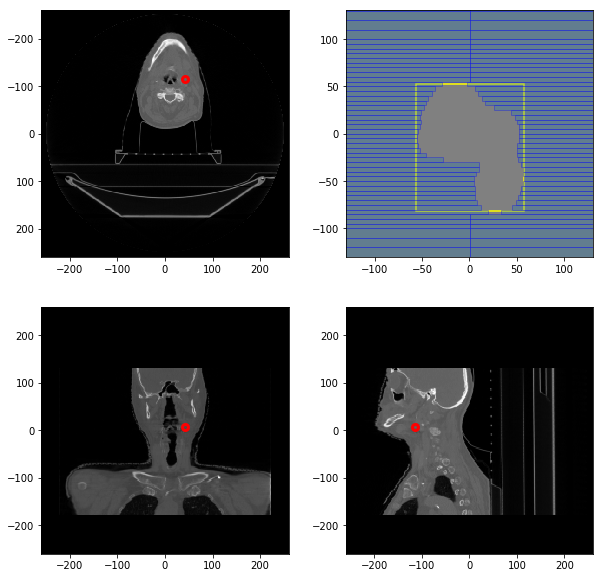

In [14]:
from scipy.interpolate import interp1d

isocenter = cp0.IsocenterPosition # Isocenter座標の読み込み

fig = plt.figure(figsize=(10,10))

# axial
ax1 = fig.add_subplot(2,2,1)
f_z = interp1d(ct.z_array, ct.volume, axis=0)
iso_z = f_z(isocenter[2])
ax1.imshow(iso_z, cmap='gray', extent=(ct.x_min, ct.x_max, ct.y_max, ct.y_min))
ax1.plot(isocenter[0], isocenter[1], marker='o', mfc='none', mec='red', mew=3)
ax1.set_xlim([-260,260])
ax1.set_ylim([260,-260])
ax1.set_facecolor('black')
ax1.set_aspect('equal')

# coronal
ax2 = fig.add_subplot(2,2,3)
f_y = interp1d(ct.y_array, ct.volume, axis=1)
iso_y = f_y(isocenter[1])
ax2.imshow(iso_y, cmap='gray', extent=(ct.x_min, ct.x_max, ct.z_min, ct.z_max))
ax2.plot(isocenter[0], isocenter[2], marker='o', mfc='none', mec='red', mew=3)
ax2.set_xlim([-260,260])
ax2.set_ylim([-260,260])
ax2.set_facecolor('black')
ax2.set_aspect('equal')

# sagittal
ax3 = fig.add_subplot(2,2,4)
f_x = interp1d(ct.x_array, ct.volume, axis=2)
iso_x = f_x(isocenter[0])
ax3.imshow(iso_x, cmap='gray', extent=(ct.y_min, ct.y_max, ct.z_min, ct.z_max))
ax3.plot(isocenter[1], isocenter[2], marker='o', mfc='none', mec='red', mew=3)
ax3.set_xlim([-260,260])
ax3.set_ylim([-260,260])
ax3.set_facecolor('black')
ax3.set_aspect('equal')

# BEV
ax4 = fig.add_subplot(2,2,2)
make_bev(plan.BeamSequence[0], ax4)

### DRRを作る

In [15]:
from pydicom_tools import DRR

drr1 = DRR(ct, plan.BeamSequence[0], size=300)
drr2 = DRR(ct, plan.BeamSequence[1], size=300)

Text(0.5, 1.0, 'Field 2')

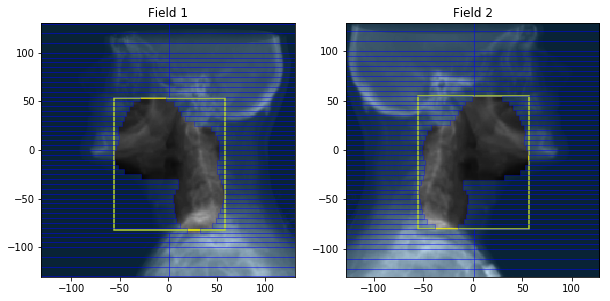

In [16]:
fig = plt.figure(figsize=(10,5)) # figureサイズを指定
ax1 = fig.add_subplot(1,2,1) # 1行2列の1番目のSubplotを追加
make_bev(plan.BeamSequence[0], ax1) # 1番目のBeamと作ったSubplotをmake_bev関数に渡す
ax1.imshow(drr1.image, cmap='gray', extent=drr1.extent)
ax1.set_title(plan.BeamSequence[0].BeamName) # SubplotにTitle追加
ax2 = fig.add_subplot(1,2,2) # 1行2列の2番目のSubplotを追加、以下同様
make_bev(plan.BeamSequence[1], ax2)
ax2.imshow(drr2.image, cmap='gray', extent=drr2.extent)
ax2.set_title(plan.BeamSequence[1].BeamName)

### DRRクラス

In [0]:
import numpy as np
import itk

class DRR:
    """
    DRRに関するクラス
    """
    def __init__(self, ct, beam, size=256):
        self.size = size
        self.image = self._make_drr(ct, beam, size)
        self.extent = (-size/2., size/2., -size/2., size/2.)

    def _make_drr(self, ct, beam, size):
        """
        CTImageクラスのインスタンスとBeamからDRR生成

        Parameters
        ----------
        ct : Instance of CTImage class
            CTImageクラスのインスタンス
        beam : object
            BeamSequenceの要素
        size : float
            DRR Imageのサイズ(mm)
        """
        if not isinstance(ct, CTImage):
            raise TypeError(
                "1st argument must be the instance of CTImage class.")

        # isocenter座標、ガントリ角、カウチ角度の取り出し
        cp_0 = beam.ControlPointSequence[0]  # 最初のコントロールポイント
        isocenter = cp_0.IsocenterPosition
        gan_angle = np.radians(float(cp_0.GantryAngle))
        couch_angle = np.radians(float(cp_0.PatientSupportAngle))

        # numpy配列からITK Imageに変換
        image = itk.GetImageFromArray(ct.volume.astype(np.int16))

        # 原点位置をIsocenter位置に設定
        origin = (ct.position[0] - isocenter[0],
                  ct.position[1] - isocenter[1],
                  -ct.position[2]+isocenter[2])
        # ボクセル間隔を設定
        spacing = (ct.pixel_spacing[0], ct.pixel_spacing[1], ct.thickness)

        image.SetOrigin(origin)
        image.SetSpacing(spacing)

        # RayCastの設定
        image_type = itk.Image[itk.SS, 3]
        ray_caster_type = \
            itk.RayCastInterpolateImageFunction[image_type, itk.D]
        interp = ray_caster_type.New()
        interp.SetInputImage(image)

        # 仮想線源の位置を設定 (SAD=1000 mm)
        g_sin = np.sin(gan_angle)
        g_cos = np.cos(gan_angle)
        c_sin = np.sin(couch_angle)
        c_cos = np.cos(couch_angle)

        focus = (1000*g_sin*c_cos, -1000*g_cos, 1000*g_sin*c_sin)
        interp.SetFocalPoint(focus)

        # 仮想線源位置が変更された際の変換
        transform_type = itk.TranslationTransform[itk.D, 3]
        transform = transform_type.New()
        interp.SetTransform(transform)

        # ピクセル間を線形に補間
        interpolate_type = \
            itk.LinearInterpolateImageFunction[image_type, itk.D]
        aux_interpolator = interpolate_type.New()
        interp.SetInterpolator(aux_interpolator)

        # HU値-200以上のみを反映
        interp.SetThreshold(-200)

        # 256x256ピクセルのDRRを生成
        drr = np.zeros((256, 256))

        # 1ピクセルサイズ
        pixel = size / 256.

        for i in range(256):
            for j in range(256):
                query = ((i-128)*pixel*g_cos*c_cos-(j-128)*pixel*c_sin,
                         (i-128)*pixel*g_sin,
                         (i-128)*pixel*g_cos*c_sin+(j-128)*pixel*c_cos)
                drr[j, i] = interp.Evaluate(query)

        return drr
